# Análise Descritiva - Base Kaiserhaus
Notebook organizado para **Google Colab**.

**Objetivos:** análise exploratória inicial, qualidade dos dados e estatísticas descritivas da base de pedidos do Kaiserhaus.


## 0. Setup (instalações e imports)
Execute esta célula apenas uma vez para instalar dependências no Colab.


In [41]:
# Se estiver no Colab, descomente a linha abaixo para garantir as dependências
# !pip install -q pandas numpy matplotlib seaborn

import os, math, textwrap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Diretório de saída para gráficos e artefatos
OUT_DIR = "out"
os.makedirs(OUT_DIR, exist_ok=True)

# Configs visuais básicas (matplotlib)
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["axes.grid"] = True
plt.rcParams["font.size"] = 10

print("✅ Bibliotecas importadas com sucesso!")


✅ Bibliotecas importadas com sucesso!


## 1. Carregar dados
Coloque seu arquivo `Base_Kaiserhaus.csv` no ambiente do Colab (ou no Google Drive) e informe o caminho.


In [42]:
# Caminho para o arquivo CSV
caminho_csv = "Base_Kaiserhaus.csv"  # coloque o nome/caminho correto

# Leitura do arquivo CSV
df = pd.read_csv(caminho_csv)

print("📊 Dimensão da base:", df.shape)
print("📋 Colunas disponíveis:", list(df.columns))
print("\n🔍 Primeiras 5 linhas:")
df.head()


📊 Dimensão da base: (5000, 16)
📋 Colunas disponíveis: ['macro_bairro', 'nome_cliente', 'bairro_destino', 'order_datetime', 'platform', 'order_mode', 'distance_km', 'tempo_preparo_minutos', 'status', 'eta_minutes_quote', 'actual_delivery_minutes', 'total_brl', 'classe_pedido', 'platform_commission_pct', 'num_itens', 'satisfacao_nivel']

🔍 Primeiras 5 linhas:


,macro_bairro,nome_cliente,bairro_destino,order_datetime,platform,order_mode,distance_km,tempo_preparo_minutos,status,eta_minutes_quote,actual_delivery_minutes,total_brl,classe_pedido,platform_commission_pct,num_itens,satisfacao_nivel
0,Outros,Júlia Ramos,Bela Vista,2024-01-01 15:08:00,rappi,delivery,6.916192,34,delivered,50,62.4,288.01,familia,0.16,8,3
1,Santo Amaro,Gustavo R. Rezende,Santo Amaro,2024-01-02 07:49:00,ifood,delivery,5.753085,16,delivered,45,35.6,125.02,combo,0.16,3,5
2,Jardins,Valentina Y. Oliveira,Jardins,2024-01-02 10:14:00,ifood,delivery,4.545672,15,delivered,43,34.5,110.76,combo,0.12,4,5
3,Vila Olímpia,Mariana Moreira,Vila Olímpia,2024-01-02 10:58:00,site_proprio,retirada,0.059679,6,delivered,19,14.4,45.16,prato_unico,0.00,1,5
4,Moema,Daniel Rocha,Ibirapuera,2024-01-02 12:56:00,site_proprio,retirada,0.102063,25,delivered,28,26.6,123.12,combo,0.00,3,5


## 2. Informações básicas da base
Análise inicial da estrutura e tipos de dados.


In [43]:
print("📈 INFORMAÇÕES BÁSICAS DA BASE")
print("=" * 50)

print(f"\n📊 Dimensões:")
print(f"   • Linhas: {df.shape[0]:,}")
print(f"   • Colunas: {df.shape[1]}")

print(f"\n🔍 Tipos de dados:")
print(df.dtypes)


📈 INFORMAÇÕES BÁSICAS DA BASE

📊 Dimensões:
   • Linhas: 5,000
   • Colunas: 16

🔍 Tipos de dados:
macro_bairro                object
nome_cliente                object
bairro_destino              object
order_datetime              object
platform                    object
order_mode                  object
distance_km                float64
tempo_preparo_minutos        int64
status                      object
eta_minutes_quote            int64
actual_delivery_minutes    float64
total_brl                  float64
classe_pedido               object
platform_commission_pct    float64
num_itens                    int64
satisfacao_nivel             int64
dtype: object


## 3. Análise de valores nulos
Identificação de dados faltantes na base.


In [44]:
print("🔍 ANÁLISE DE VALORES NULOS")
print("=" * 50)

# Contagem de valores nulos por coluna
valores_nulos = df.isnull().sum()
percentual_nulos = (valores_nulos / len(df)) * 100

# Criar DataFrame com informações de nulos
info_nulos = pd.DataFrame({
    'Coluna': valores_nulos.index,
    'Valores_Nulos': valores_nulos.values,
    'Percentual': percentual_nulos.values
})

# Filtrar apenas colunas com valores nulos
info_nulos = info_nulos[info_nulos['Valores_Nulos'] > 0].sort_values('Valores_Nulos', ascending=False)

if len(info_nulos) > 0:
    print("\n⚠️  Colunas com valores nulos:")
    print(info_nulos.to_string(index=False))
else:
    print("\n✅ Nenhum valor nulo encontrado na base!")

print(f"\n📊 Resumo:")
print(f"   • Total de valores nulos: {df.isnull().sum().sum()}")
print(f"   • Percentual geral: {(df.isnull().sum().sum() / (df.shape[0] * df.shape[1])) * 100:.2f}%")


🔍 ANÁLISE DE VALORES NULOS

⚠️  Colunas com valores nulos:
                 Coluna  Valores_Nulos  Percentual
            distance_km            323        6.46
actual_delivery_minutes            200        4.00

📊 Resumo:
   • Total de valores nulos: 523
   • Percentual geral: 0.65%


-

## 5. Análise de variáveis categóricas
Exploração das variáveis categóricas e suas distribuições.


In [45]:
print("📊 ANÁLISE DE VARIÁVEIS CATEGÓRICAS")
print("=" * 50)

# Identificar colunas categóricas
colunas_categoricas = df.select_dtypes(include=['object']).columns.tolist()

print(f"\n🔍 Colunas categóricas identificadas: {colunas_categoricas}")

for coluna in colunas_categoricas:
    print(f"\n📋 {coluna.upper()}:")
    print(f"   • Valores únicos: {df[coluna].nunique()}")
    print(f"   • Valores mais frequentes:")
    
    # Mostrar top 5 valores mais frequentes
    top_valores = df[coluna].value_counts().head(5)
    for valor, count in top_valores.items():
        percentual = (count / len(df)) * 100
        print(f"     - {valor}: {count:,} ({percentual:.1f}%)")
    
    # Se há muitos valores únicos, mostrar resumo
    if df[coluna].nunique() > 10:
        print(f"   • ... e mais {df[coluna].nunique() - 5} valores únicos")


📊 ANÁLISE DE VARIÁVEIS CATEGÓRICAS

🔍 Colunas categóricas identificadas: ['macro_bairro', 'nome_cliente', 'bairro_destino', 'order_datetime', 'platform', 'order_mode', 'status', 'classe_pedido']

📋 MACRO_BAIRRO:
   • Valores únicos: 10
   • Valores mais frequentes:
     - Brooklin: 881 (17.6%)
     - Moema: 679 (13.6%)
     - Vila Mariana: 530 (10.6%)
     - Vila Olímpia: 516 (10.3%)
     - Itaim: 497 (9.9%)

📋 NOME_CLIENTE:
   • Valores únicos: 2000
   • Valores mais frequentes:
     - Júlia Ramos: 3 (0.1%)
     - Tatiane B. Ferreira: 3 (0.1%)
     - Eduardo S. Borges: 3 (0.1%)
     - Isabela Batista: 3 (0.1%)
     - Felipe R. Correia: 3 (0.1%)
   • ... e mais 1995 valores únicos

📋 BAIRRO_DESTINO:
   • Valores únicos: 20
   • Valores mais frequentes:
     - Vila Olímpia: 516 (10.3%)
     - Itaim Bibi: 497 (9.9%)
     - Campo Belo: 446 (8.9%)
     - Brooklin: 435 (8.7%)
     - Pinheiros: 393 (7.9%)
   • ... e mais 15 valores únicos

📋 ORDER_DATETIME:
   • Valores únicos: 4964
   • Val

## 6. Análise de variáveis numéricas
Exploração das variáveis numéricas e identificação de outliers.


In [46]:
print("📊 ANÁLISE DE VARIÁVEIS NUMÉRICAS")
print("=" * 50)

# Identificar colunas numéricas
colunas_numericas = df.select_dtypes(include=[np.number]).columns.tolist()

print(f"\n🔍 Colunas numéricas identificadas: {colunas_numericas}")

# Estatísticas descritivas
print(f"\n📈 ESTATÍSTICAS DESCRITIVAS:")
desc_stats = df[colunas_numericas].describe()
print(desc_stats.round(2))


📊 ANÁLISE DE VARIÁVEIS NUMÉRICAS

🔍 Colunas numéricas identificadas: ['distance_km', 'tempo_preparo_minutos', 'eta_minutes_quote', 'actual_delivery_minutes', 'total_brl', 'platform_commission_pct', 'num_itens', 'satisfacao_nivel']

📈 ESTATÍSTICAS DESCRITIVAS:
       distance_km  tempo_preparo_minutos  eta_minutes_quote  \
count      4677.00                5000.00            5000.00   
mean          3.51                  16.42              37.48   
std           2.59                   7.92               8.55   
min           0.00                   6.00              12.00   
25%           0.74                  11.00              32.00   
50%           3.65                  15.00              39.00   
75%           5.59                  21.00              44.00   
max           9.95                  57.00              59.00   

       actual_delivery_minutes  total_brl  platform_commission_pct  num_itens  \
count                  4800.00    5000.00                  5000.00    5000.00   
m

## 7. Identificação de outliers MELHORADA
Detecção de valores extremos usando método IQR + limites de negócio.


In [47]:
print("🔍 IDENTIFICAÇÃO DE OUTLIERS MELHORADA (IQR + Lógica de Negócio)")
print("=" * 65)

def detectar_outliers_inteligente(df, coluna):
    """
    Detecta outliers usando método IQR + limites de negócio
    """
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1
    
    # Limites estatísticos
    limite_inferior_stat = Q1 - 1.5 * IQR
    limite_superior_stat = Q3 + 1.5 * IQR
    
    # Limites de negócio específicos por variável
    limites_negocio = {
        'distance_km': {'min': 0, 'max': 30},  # 0-30km faz sentido para delivery
        'tempo_preparo_minutos': {'min': 0, 'max': 90},  # 0-90min para preparo
        'eta_minutes_quote': {'min': 5, 'max': 120},  # 5-120min para ETA
        'actual_delivery_minutes': {'min': 0, 'max': 120},  # 0-120min para entrega real
        'total_brl': {'min': 0, 'max': 2000},  # 0-2000 reais por pedido
        'platform_commission_pct': {'min': 0, 'max': 0.35},  # 0-35% de comissão
        'num_itens': {'min': 1, 'max': 50},  # 1-50 itens por pedido
        'satisfacao_nivel': {'min': 0, 'max': 5}  # 0-5 escala de satisfação
    }
    
    # Usar limite de negócio se disponível, senão usar estatístico
    if coluna in limites_negocio:
        limite_inferior = max(limite_inferior_stat, limites_negocio[coluna]['min'])
        limite_superior = min(limite_superior_stat, limites_negocio[coluna]['max'])
    else:
        limite_inferior = limite_inferior_stat
        limite_superior = limite_superior_stat
    
    outliers = df[(df[coluna] < limite_inferior) | (df[coluna] > limite_superior)]
    
    # Separar outliers abaixo e acima dos limites
    outliers_abaixo = df[df[coluna] < limite_inferior]
    outliers_acima = df[df[coluna] > limite_superior]
    
    return {
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'limite_inferior_stat': limite_inferior_stat,
        'limite_superior_stat': limite_superior_stat,
        'limite_inferior_final': limite_inferior,
        'limite_superior_final': limite_superior,
        'outliers': outliers,
        'outliers_abaixo': outliers_abaixo,
        'outliers_acima': outliers_acima,
        'count_outliers': len(outliers),
        'count_abaixo': len(outliers_abaixo),
        'count_acima': len(outliers_acima),
        'percentual_outliers': (len(outliers) / len(df)) * 100
    }

print("\n📊 Análise de outliers por variável (com limites de negócio):")

for coluna in colunas_numericas:
    resultado = detectar_outliers_inteligente(df, coluna)
    
    print(f"\n🔍 {coluna.upper()}:")
    print(f"   • Q1: {resultado['Q1']:.2f}")
    print(f"   • Q3: {resultado['Q3']:.2f}")
    print(f"   • IQR: {resultado['IQR']:.2f}")
    print(f"   • Limites estatísticos: [{resultado['limite_inferior_stat']:.2f}, {resultado['limite_superior_stat']:.2f}]")
    print(f"   • Limites finais: [{resultado['limite_inferior_final']:.2f}, {resultado['limite_superior_final']:.2f}]")
    print(f"   • Total outliers: {resultado['count_outliers']:,} ({resultado['percentual_outliers']:.1f}%)")
    
    # Mostrar exemplos separados
    if resultado['count_abaixo'] > 0:
        exemplos_abaixo = resultado['outliers_abaixo'][coluna].head(5).tolist()
        print(f"   • Abaixo do limite ({resultado['count_abaixo']} registros): {exemplos_abaixo}")
    
    if resultado['count_acima'] > 0:
        exemplos_acima = resultado['outliers_acima'][coluna].head(5).tolist()
        print(f"   • Acima do limite ({resultado['count_acima']} registros): {exemplos_acima}")


🔍 IDENTIFICAÇÃO DE OUTLIERS MELHORADA (IQR + Lógica de Negócio)

📊 Análise de outliers por variável (com limites de negócio):

🔍 DISTANCE_KM:
   • Q1: 0.74
   • Q3: 5.59
   • IQR: 4.85
   • Limites estatísticos: [-6.53, 12.87]
   • Limites finais: [0.00, 12.87]
   • Total outliers: 0 (0.0%)

🔍 TEMPO_PREPARO_MINUTOS:
   • Q1: 11.00
   • Q3: 21.00
   • IQR: 10.00
   • Limites estatísticos: [-4.00, 36.00]
   • Limites finais: [0.00, 36.00]
   • Total outliers: 106 (2.1%)
   • Acima do limite (106 registros): [41, 54, 41, 57, 39]

🔍 ETA_MINUTES_QUOTE:
   • Q1: 32.00
   • Q3: 44.00
   • IQR: 12.00
   • Limites estatísticos: [14.00, 62.00]
   • Limites finais: [14.00, 62.00]
   • Total outliers: 2 (0.0%)
   • Abaixo do limite (2 registros): [13, 12]

🔍 ACTUAL_DELIVERY_MINUTES:
   • Q1: 20.10
   • Q3: 37.90
   • IQR: 17.80
   • Limites estatísticos: [-6.60, 64.60]
   • Limites finais: [0.00, 64.60]
   • Total outliers: 48 (1.0%)
   • Abaixo do limite (9 registros): [-0.9, -1.1, -1.4, -2.4, -1

## 8. Análise de valores impossíveis
Identificação de valores que não fazem sentido do ponto de vista de negócio.


In [48]:
print("⚠️  ANÁLISE DE VALORES IMPOSSÍVEIS")
print("=" * 50)

# Verificações específicas por variável
problemas_encontrados = False

# 1. Tempos negativos
tempos_negativos = df[df['actual_delivery_minutes'] < 0]
if len(tempos_negativos) > 0:
    print(f"\n❌ Tempos de entrega negativos: {len(tempos_negativos)} registros")
    print(f"   Exemplos: {tempos_negativos['actual_delivery_minutes'].head(3).tolist()}")
    problemas_encontrados = True

# 2. Distâncias negativas
distancias_negativas = df[df['distance_km'] < 0]
if len(distancias_negativas) > 0:
    print(f"\n❌ Distâncias negativas: {len(distancias_negativas)} registros")
    problemas_encontrados = True

# 3. Valores monetários negativos
valores_negativos = df[df['total_brl'] < 0]
if len(valores_negativos) > 0:
    print(f"\n❌ Valores monetários negativos: {len(valores_negativos)} registros")
    problemas_encontrados = True

# 4. Tempos de preparo negativos
preparo_negativo = df[df['tempo_preparo_minutos'] < 0]
if len(preparo_negativo) > 0:
    print(f"\n❌ Tempos de preparo negativos: {len(preparo_negativo)} registros")
    problemas_encontrados = True

# 5. Satisfação fora do range esperado (1-5)
satisfacao_invalida = df[(df['satisfacao_nivel'] < 1) | (df['satisfacao_nivel'] > 5)]
if len(satisfacao_invalida) > 0:
    print(f"\n❌ Satisfação fora do range (1-5): {len(satisfacao_invalida)} registros")
    problemas_encontrados = True

if not problemas_encontrados:
    print("\n✅ Nenhum valor impossível encontrado!")
else:
    print(f"\n📊 Total de registros com problemas: {len(tempos_negativos) + len(distancias_negativas) + len(valores_negativos) + len(preparo_negativo) + len(satisfacao_invalida)}")


⚠️  ANÁLISE DE VALORES IMPOSSÍVEIS

❌ Tempos de entrega negativos: 9 registros
   Exemplos: [-0.9, -1.1, -1.4]

📊 Total de registros com problemas: 9


## 9. Resumo da qualidade dos dados
Síntese final da qualidade da base de dados.


In [49]:
print("📋 RESUMO DA QUALIDADE DOS DADOS")
print("=" * 50)

# Calcular métricas de qualidade
total_registros = len(df)
total_valores_nulos = df.isnull().sum().sum()
total_duplicatas = df.duplicated().sum()

# Contar outliers totais
total_outliers = 0
for coluna in colunas_numericas:
    resultado = detectar_outliers_iqr(df, coluna)
    total_outliers += resultado['count_outliers']

# Contar valores impossíveis
valores_impossiveis = (
    len(df[df['actual_delivery_minutes'] < 0]) +
    len(df[df['distance_km'] < 0]) +
    len(df[df['total_brl'] < 0]) +
    len(df[df['tempo_preparo_minutos'] < 0]) +
    len(df[(df['satisfacao_nivel'] < 1) | (df['satisfacao_nivel'] > 5)])
)

print(f"\n📊 MÉTRICAS GERAIS:")
print(f"   • Total de registros: {total_registros:,}")
print(f"   • Total de colunas: {df.shape[1]}")
print(f"   • Uso de memória: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print(f"\n🔍 PROBLEMAS IDENTIFICADOS:")
print(f"   • Valores nulos: {total_valores_nulos:,} ({(total_valores_nulos / (total_registros * df.shape[1])) * 100:.2f}%)")
print(f"   • Duplicatas completas: {total_duplicatas:,} ({(total_duplicatas / total_registros) * 100:.2f}%)")
print(f"   • Valores impossíveis: {valores_impossiveis:,} ({(valores_impossiveis / total_registros) * 100:.2f}%)")
print(f"   • Outliers detectados: {total_outliers:,} ({(total_outliers / total_registros) * 100:.2f}%)")

# Calcular score de qualidade (0-100)
problemas_totais = total_valores_nulos + total_duplicatas + valores_impossiveis
score_qualidade = max(0, 100 - (problemas_totais / total_registros) * 100)

print(f"\n🎯 SCORE DE QUALIDADE: {score_qualidade:.1f}/100")

if score_qualidade >= 90:
    print("   ✅ Excelente qualidade!")
elif score_qualidade >= 80:
    print("   ⚠️  Boa qualidade, mas requer limpeza")
elif score_qualidade >= 70:
    print("   ⚠️  Qualidade moderada, limpeza necessária")
else:
    print("   ❌ Qualidade baixa, limpeza crítica necessária")

print(f"\n📝 PRÓXIMOS PASSOS:")
print(f"   1. Implementar limpeza de dados")
print(f"   2. Tratar valores nulos")
print(f"   3. Corrigir valores impossíveis")
print(f"   4. Decidir estratégia para outliers")
print(f"   5. Criar base limpa para análises")


📋 RESUMO DA QUALIDADE DOS DADOS


NameError: name 'detectar_outliers_iqr' is not defined

## 10. Análise de Correlação
Análise das correlações entre variáveis numéricas para identificar relações importantes.


In [ ]:

# Calcular matriz de correlação apenas para variáveis numéricas
matriz_correlacao = df[colunas_numericas].corr()

# Extrair correlações mais fortes (excluindo diagonal)
correlacoes = []
for i in range(len(matriz_correlacao.columns)):
    for j in range(i+1, len(matriz_correlacao.columns)):
        var1 = matriz_correlacao.columns[i]
        var2 = matriz_correlacao.columns[j]
        corr_value = matriz_correlacao.iloc[i, j]
        correlacoes.append((var1, var2, corr_value))

# Ordenar por valor absoluto da correlação
correlacoes.sort(key=lambda x: abs(x[2]), reverse=True)


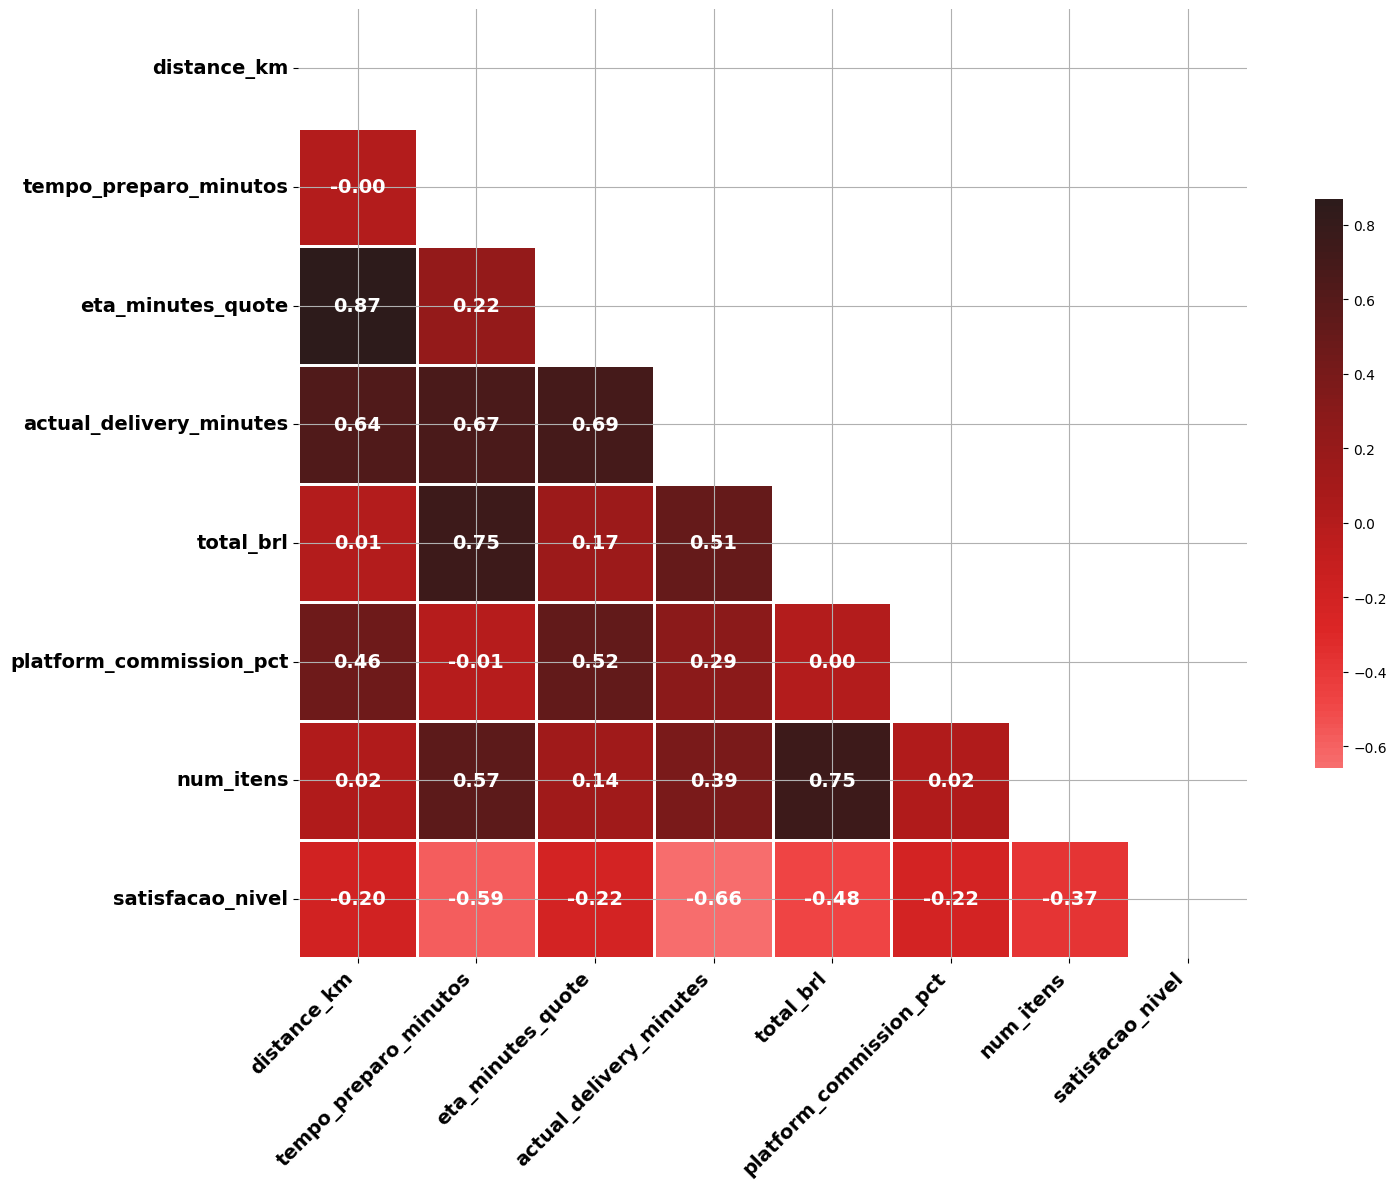

In [ ]:
# Criar gráfico de heatmap da correlação
plt.figure(figsize=(16, 12))

# Criar colormap personalizado com gradiente vermelho invertido
from matplotlib.colors import LinearSegmentedColormap
colors = ['#FCA5A5', '#F87171', '#EF4444', '#DC2626', '#C41E1E', '#A51A1A', '#8B1A1A', '#6B1A1A', '#4A1A1A', '#2D1B1B']
n_bins = 100
custom_cmap = LinearSegmentedColormap.from_list('custom_red_inverted', colors, N=n_bins)

mask = np.triu(np.ones_like(matriz_correlacao, dtype=bool))  # Máscara para mostrar apenas metade
heatmap = sns.heatmap(matriz_correlacao, 
                     mask=mask,
                     annot=True, 
                     cmap=custom_cmap, 
                     center=0,
                     square=True,
                     fmt='.2f',  # Reduzido para 2 casas decimais para melhor legibilidade
                     cbar_kws={"shrink": .6},  # Barra de cores menor
                     linewidths=1.0,  # Linhas mais grossas
                     annot_kws={"size": 14, "weight": "bold"})  # Texto maior e em negrito


# Rotacionar labels do eixo x para melhor legibilidade
plt.xticks(rotation=45, ha='right', fontsize=14, fontweight='bold')
plt.yticks(rotation=0, fontsize=14, fontweight='bold')

# Ajustar layout para melhor visualização
plt.tight_layout()
plt.savefig("correlacao.png", dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

## 11. Graficos


In [50]:
# Exportar dados de plataformas para Excel
contagem_plataforma = df['platform'].value_counts()
percentuais = df['platform'].value_counts(normalize=True) * 100

# Criar DataFrame para Excel
df_plataformas = pd.DataFrame({
    'Plataforma': contagem_plataforma.index,
    'Quantidade_Pedidos': contagem_plataforma.values,
    'Percentual': percentuais.values
})

# Salvar no Excel
df_plataformas.to_excel("out/dados_plataformas.xlsx", index=False)
print("✅ Dados de plataformas exportados para Excel!")
print(df_plataformas)

✅ Dados de plataformas exportados para Excel!
     Plataforma  Quantidade_Pedidos  Percentual
0         ifood                2661       53.22
1  site_proprio                1052       21.04
2         rappi                 747       14.94
3      whatsapp                 540       10.80


In [51]:
# Exportar dados de macro_bairros para Excel
contagem_bairro = df['macro_bairro'].value_counts()
percentuais_bairro = df['macro_bairro'].value_counts(normalize=True) * 100

# Criar DataFrame para Excel
df_bairros = pd.DataFrame({
    'Macro_Bairro': contagem_bairro.index,
    'Quantidade_Pedidos': contagem_bairro.values,
    'Percentual': percentuais_bairro.values
})

# Salvar no Excel
df_bairros.to_excel("out/dados_bairros.xlsx", index=False)
print("✅ Dados de bairros exportados para Excel!")
print(df_bairros)

✅ Dados de bairros exportados para Excel!
   Macro_Bairro  Quantidade_Pedidos  Percentual
0      Brooklin                 881       17.62
1         Moema                 679       13.58
2  Vila Mariana                 530       10.60
3  Vila Olímpia                 516       10.32
4         Itaim                 497        9.94
5       Jardins                 403        8.06
6     Pinheiros                 393        7.86
7   Santo Amaro                 387        7.74
8        Outros                 364        7.28
9       Morumbi                 350        7.00


In [54]:
# Criar dados para gráfico de linha com todos os valores
dados_tempo = df.dropna(subset=['eta_minutes_quote', 'actual_delivery_minutes'])

# Criar DataFrame com todos os valores individuais
tabela_completa = pd.DataFrame({
    'Pedido': range(1, len(dados_tempo) + 1),  # Número do pedido
    'Tempo_Estimado': dados_tempo['eta_minutes_quote'].values,
    'Tempo_Real': dados_tempo['actual_delivery_minutes'].values
})

# Salvar no Excel
tabela_completa.to_excel("out/tabela_tempos_completa.xlsx", index=False)
print("✅ Tabela completa com todos os valores criada!")
print(f"Total de pedidos: {len(tabela_completa)}")
print(tabela_completa.head(10))  # Mostrar primeiros 10

✅ Tabela completa com todos os valores criada!
Total de pedidos: 4800
   Pedido  Tempo_Estimado  Tempo_Real
0       1              50        62.4
1       2              45        35.6
2       3              43        34.5
3       4              19        14.4
4       5              28        26.6
5       6              44        33.5
6       7              44        36.5
7       8              40        34.5
8       9              29        19.9
9      10              47        48.6


In [59]:
# Criar tabela Excel para gráfico de pizza - Status das entregas
dados_tempo = df.dropna(subset=['eta_minutes_quote', 'actual_delivery_minutes'])

# Calcular diferença e categorizar
diferenca = dados_tempo['actual_delivery_minutes'] - dados_tempo['eta_minutes_quote']
status = pd.cut(diferenca, bins=[-float('inf'), -5, 5, float('inf')], 
                labels=['Antecipada (>5min)', 'No Prazo (±5min)', 'Atrasada (>5min)'])

# Contar por status
contagem_status = status.value_counts()
percentuais = contagem_status / len(dados_tempo) * 100

# Criar DataFrame para Excel
df_pizza = pd.DataFrame({
    'Status': contagem_status.index,
    'Quantidade_Pedidos': contagem_status.values,
    'Percentual': percentuais.values
})

# Salvar no Excel
df_pizza.to_excel("out/dados_pizza_status.xlsx", index=False)
print("✅ Tabela para gráfico de pizza criada!")
print(df_pizza)

✅ Tabela para gráfico de pizza criada!
               Status  Quantidade_Pedidos  Percentual
0  Antecipada (>5min)                3090   64.375000
1    No Prazo (±5min)                1288   26.833333
2    Atrasada (>5min)                 422    8.791667
